# Experments Settings:
- mutation_rate = 0.01
- iterations = 100
- pool_size = 21
- Learning = Classification
- Target = Cover Type
- PCA  = Explained Variance = 99%

In [1]:
import os
from time import time
import argparse
import numpy as np
from sklearn.svm import SVC

from sklearn.datasets import fetch_covtype, get_data_home,load_digits
from sklearn.externals.joblib import Memory
from sklearn.metrics import zero_one_loss
from sklearn.externals.joblib import Memory
from sklearn.utils import check_array
from sklearn.datasets import fetch_mldata

import boto3
import pandas as pd
from sagemaker import get_execution_role
import seaborn as se
from genalgo import GenAlgo
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler


## Importing Covertype data

In [2]:
memory = Memory(os.path.join(get_data_home(), 'covertype_benchmark_data'), mmap_mode='r')
@memory.cache
def load_data(dtype=np.float32, order='C', random_state=13):
    """Load the data, then cache and memmap the train/test split"""
    ######################################################################
    # Load dataset
    print("Loading dataset...")
    data = fetch_covtype(download_if_missing=True, shuffle=True,
                         random_state=random_state)
    X = check_array(data['data'], dtype=dtype, order=order)
    y = (data['target'] != 1).astype(np.int)
 
    # Create train-test split (as [Joachims, 2006])
    print("Creating train-test split...")
    n_train = 522911
    X_train = X[:n_train]
    y_train = y[:n_train]
    X_test = X[n_train:]
    y_test = y[n_train:]
 
    # Standardize first 10 features (the numerical ones)
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    mean[10:] = 0.0
    std[10:] = 1.0
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    return X_train, X_test, y_train, y_test

In [3]:
# Calling the above method to download the data from portal
X_train, X_test, y_train, y_test = load_data()

INFO:sklearn.datasets.covtype:Downloading https://ndownloader.figshare.com/files/5976039


________________________________________________________________________________
[Memory] Calling __main__--home-ec2-user-SageMaker-3 Expermenent -__ipython-input__.load_data...
load_data()
Loading dataset...
Creating train-test split...
_______________________________________________________load_data - 71.4s, 1.2min


In [4]:
# Scaling the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Let's try a Linear Classifier (Logistic Regression)

In [5]:
# Training set
logistic = SGDClassifier(loss='log', penalty='l2',max_iter=100000, tol=1e-5, random_state=0, n_jobs = 8)
logistic.fit(scaled_X_train, y_train)

print("Trainning Accuracy {0} %".format(accuracy_score(y_train, logistic.predict(scaled_X_train))*100))


Trainning Accuracy 76.80905546068068 %


In [6]:
print("Testing Accuracy {0} %".format(accuracy_score(y_test, logistic.predict(scaled_X_test))*100))


Testing Accuracy 76.74394588733412 %


# GenAlgo using 

In [ ]:
from genalgo import GenAlgo
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier

# Initialize the linear model
logist = SGDClassifier(loss='log', penalty='l2',max_iter=100000, tol=1e-5, random_state=0, n_jobs = 8)

# Initialize object of the Gen Algorithm
gfs = GenAlgo()


# Train the Algorithm
gfs.train(model=logist, _type='classification', X=scaled_X_train, y=y_train, pca = True) # classification model

# get results output
binary_output_of_optimal_variables, indicies_of_optimal_variables = gfs.results()

# Visualize the performance
gfs.plot_progress()


Iteration 10 Complete [Time Taken For Last Iteration: 217.62 Seconds]
Iteration 20 Complete [Time Taken For Last Iteration: 222.58 Seconds]
Iteration 30 Complete [Time Taken For Last Iteration: 214.7 Seconds]


In [12]:
# get the top most score among all the results with plotting the distribution of the Scores
def HighestClassificationScore():
    rawlogs = gfs.iterations_results
    rawlogsDF = pd.DataFrame(rawlogs)
    rawlogsDF = rawlogsDF.transpose()
    rawlogsDF.columns = ['Fitness', 'Pool', 'Scores']
    gen = 0
    allscores = list()
    while (gen !=100):
        Scores = rawlogsDF.Scores[gen]
        for i in Scores:
            allscores.append(i)
        gen = gen+1
    allscores = array(allscores)
    ax = se.distplot(allscores, axlabel = 'Accuracy', norm_hist = False, hist = True, kde = False)
    highest = allscores.max()
    s = highest*100
    return ax, print("Highest Score (accuracy) = %.2f" % s, "%")

Highest Score (accuracy) = 76.85 %


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(<matplotlib.axes._subplots.AxesSubplot at 0x7f1f3f180a58>, None)

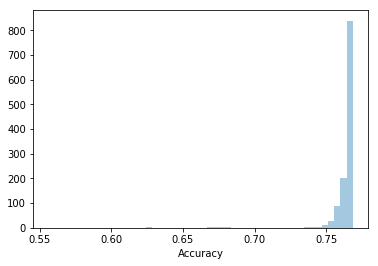

In [10]:
HighestClassificationScore()

# Using Standardized dataset for the GenAlgo

In [ ]:
# 

In [ ]:
#from genalgo import GenAlgo
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier

# Initialize the linear model
LogClf = SGDClassifier(loss='log', penalty='l2',max_iter=100000, tol=1e-5, random_state=0, n_jobs =4)

# Initialize object of the Gen Algorithm
gfsLogClf = GenAlgo()


# Train the Algorithm
gfsLogClf.train(model=LogClf, _type='classification', X=scaled_X_train, y=y_train, pca = True) # classification model

# get results output
binary_output_of_optimal_variables, indicies_of_optimal_variables = gfsLogClf.results()

# Visualize the performance
gfsLogClf.plot_progress()


Iteration 10 Complete [Time Taken For Last Iteration: 287.91 Seconds]
Iteration 20 Complete [Time Taken For Last Iteration: 296.04 Seconds]
Iteration 30 Complete [Time Taken For Last Iteration: 303.7 Seconds]


In [ ]:
#from genalgo import GenAlgo
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier

# Initialize the linear model
sgdc = SGDClassifier(loss='log', penalty='l2',max_iter=100000, tol=1e-5, random_state=0, n_jobs =4)

# Initialize object of the Gen Algorithm
gfs = GenAlgo()


# Train the Algorithm
gfs.train(model=sgdc, _type='classification', X=scaled_X_train, y=y_train, pca = True) # classification model

# get results output
binary_output_of_optimal_variables, indicies_of_optimal_variables = gfs.results()

# Visualize the performance
gfs.plot_progress()


Iteration 10 Complete [Time Taken For Last Iteration: 252.95 Seconds]
Iteration 20 Complete [Time Taken For Last Iteration: 203.3 Seconds]
Iteration 30 Complete [Time Taken For Last Iteration: 225.15 Seconds]
Iteration 40 Complete [Time Taken For Last Iteration: 230.78 Seconds]
Iteration 50 Complete [Time Taken For Last Iteration: 221.24 Seconds]


In [2]:
digits = load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

scaler2 = StandardScaler()
scaled_X_train2 = scaler2.fit_transform(X_train)
scaled_X_test2 = scaler2.transform(X_test)

Highest Score (accuracy) = 94.74 %


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(<matplotlib.axes._subplots.AxesSubplot at 0x7f475cac1eb8>, None)

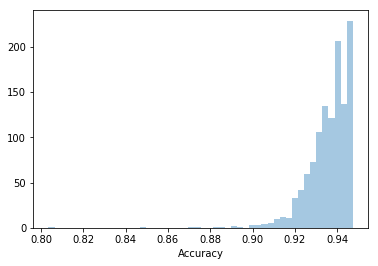

In [13]:
HighestClassificationScore()

In [ ]:
gfs.iterations_results